# [F-30] 컴퓨터 파워 UP

## 1. 멀티태스킹 (1) 멀티태스킹

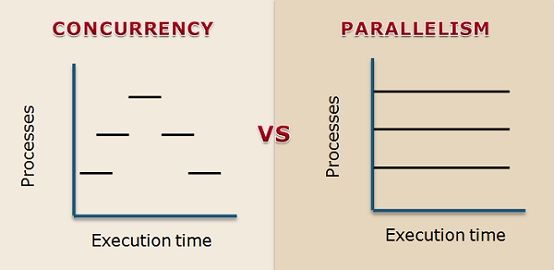

<br/>

[출처][1]


### 동시성(Concurrency)
: 하나의 processor가 여러 가지 task를 동시에 수행하는 개념
- 특정 순간에는 1가지 task만을 수행하지만, 다른 task를 수행할 수 있는 시간에는 task를 전환해서 효율적으로 여러 개의 task를 동시에 수행하는 것처럼 보인다.

<br/>

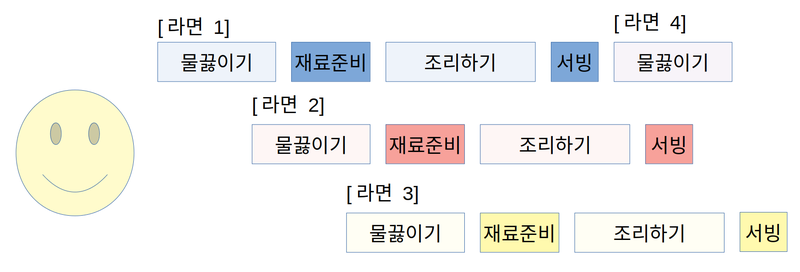

<br/>

### 병렬성(Parallelism)
: 유사한 task를 여러 processor가 동시에 수행하는 것

<br/>

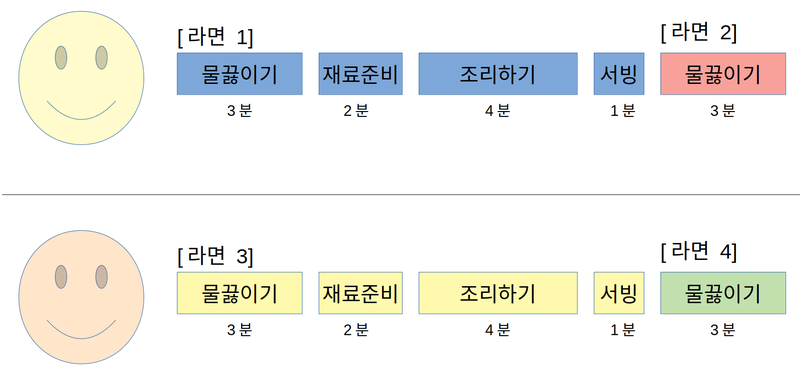


[1]:https://techdifferences.com/difference-between-concurrency-and-parallelism.html

> 동시성과 병렬성을 동시에 적용해보자.

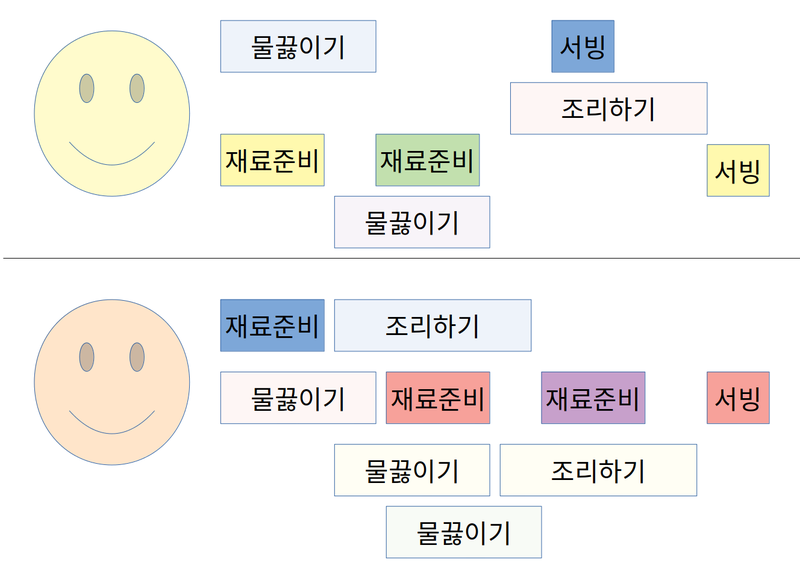

<br/>

이렇듯, 병렬성의 효율을 극대화하는 것은 동시성이 요구될 때이다. 여러 개의 프로세스가 1개의 task를 여러 개의 subtask로 쪼개어 동시에 병렬적으로 수행할 수 있기 때문이다.

### 동기 vs 비동기 (Synchronous vs Asynchronous)
- '바운드(bound)'되었다: 어떤 일을 바로 하지 못하고 대기해야 하는 일
- **동기(synchronous)**: 앞 작업이 종료되기를 무조건 기다렸다가 다음 작업을 수행하는 방식
    - 어떤 일이 순차적으로 실행됨
    - 요청과 요청에 대한 응답이 연속적으로 실행됨 (요청에 지연 발생해도 계속 대기)
- **비동기(asynchronous)**: 바운드되고 있는 작업을 기다리는 동안 다른 일을 처리하는 것
    - 어떤 일이 비순차적으로 실행됨
    - 요청과 요청에 대한 응답이 연속적으로 실행되지 않음
    - 특정 코드의 연산이 끝날 때까지 코드의 실행을 멈추지 않고 다음 코드를 먼저 실행하며, 중간에 실행되는 코드는 주로 콜백함수로 연결하기도 한다.

<br/>

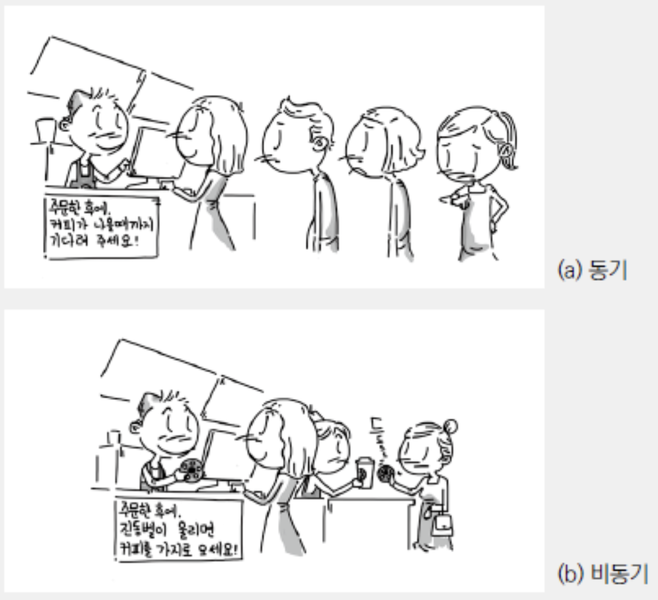

### I/O Bound vs. CPU Bound

컴퓨터가 일을 수행하며 속도 제한에 걸릴 때는 아래 2가지 상황일 것이다.
- I/O 바운드: 입력과 출력에서의 데이터(파일)처리에 시간이 소요될 때
    - 프로세스 진행 속도가 I/O 하위 시스템의 속도에 의해 제한됨
    - ex) 파일의 줄 수 계산 등
- CPU 바운드: 복잡한 수식 계산이나 그래픽 작업과 같은 엄청난 계산이 필요할 때
    - 프로세스가 진행되는 속도가 CPU의 속도에 의해 제한됨
    - ex) 행렬 곱하는 계산 등

## 2. 멀티태스킹 (2) 프로세스, 스레드, 프로파일링

### 프로세스(Process)
> An Instance of a program (ex. Python Interpreter)

하나의 프로그램을 실행할 때, 운영체제는 한 프로세스를 생성하는데, 프로세스는 운영체제의 커널(Kernel)에서 시스템 자원(CPU, 메모리, 디스크) 및 자료구조를 사용한다.

> '프로그램을 구동하여 프로그램 자체와 프로그램의 상태가 메모리상에서 실행되는 작업 단위'

- 하나의 프로그램을 한 번 구동하면 하나의 프로세스가 메모리상에 실행되지만, 여러 번 구동하면 여러 개의 프로세스가 실행된다.

In [1]:
import os

# process ID
print("process ID:", os.getpid())

# user ID
print("user ID:", os.getuid())

# group ID
print("group ID:", os.getgid())

# 현재 작업중인 디렉토리
print("current Directory:", os.getcwd())

process ID: 13
user ID: 0
group ID: 0
current Directory: /aiffel/aiffel/AIFFEL_Fundamentals


In [ ]:
# $ ps -ef | grep 13

> `PID`는 리눅스 시스템의 PID 관리기법에 의해 항상 유일한 값을 가진다.
> - 리눅스 환경에서 실행 중인 프로세스들을 구분하기 위한 고유 식별자

### Thread (스레드)
: 어떤 프로그램 내에서 실행되는 흐름의 단위

> - 프로세스: 요리를 만드는 요리사
> - 스레드: 밥 짓기, 재료 볶기, 끓이기 등의 작업

- 각 작업을 할 때 도마, 불판 등의 주방 공간은 공유되지만, 요리사끼리 각자의 주방 공간을 공유하지는 않는다.
- 마찬가지로 프로세스도 자신만의 전용 메모리 공간(Heap)을 가지는데, 해당 프로세스 내의 스레드들은 이 메모리 공간을 공유하지만 다른 프로세스와 공유하지는 않는다.

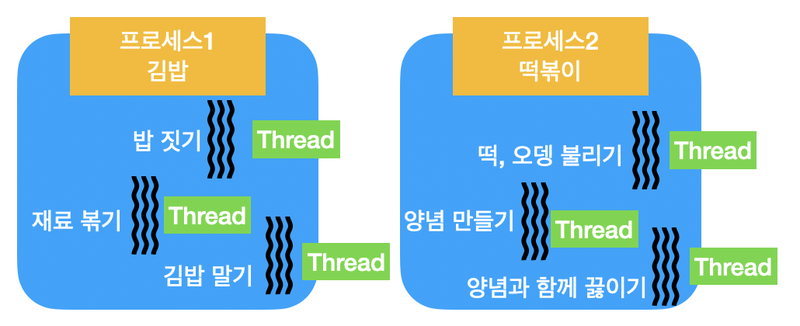

### 프로파일링(Profiling)
: 코드에서 시스템의 어느 부분이 느린지 or 어디서 RAM을 많이 사용하고 있는지를 확인하고 싶을 때 사용하는 기법

> - **프로파일링**: 애플리케이션에서 가장 자원이 집중되는 지점을 정밀하게 찾아내는 기법
> - **프로파일러**: 애플리케이션을 실행시키고 각각의 함수 실행에 드는 시간을 찾아내는 프로그램
>> **코드의 병목(bottleneck)**을 찾아내고 **성능을 측정**해주는 도구

In [2]:
import time
time.time()

1645581081.4839196

In [3]:
import timeit
timeit.Timer()

> 100까지 숫자를 배열로 만드는 방법을 각각 다른 방법으로 구현해보고 실행 시간 측정하기

In [4]:
import timeit
        
def f1():
    s = set(range(100))

    
def f2():
    l = list(range(100))

    
def f3():
    t = tuple(range(100))


def f4():
    s = str(range(100))

    
def f5():
    s = set()
    for i in range(100):
        s.add(i)

def f6():
    l = []
    for i in range(100):
        l.append(i)
    
def f7():
    s_comp = {i for i in range(100)}

    
def f8():
    l_comp = [i for i in range(100)]
    

if __name__ == "__main__":
    t1 = timeit.Timer("f1()", "from __main__ import f1")
    t2 = timeit.Timer("f2()", "from __main__ import f2")
    t3 = timeit.Timer("f3()", "from __main__ import f3")
    t4 = timeit.Timer("f4()", "from __main__ import f4")
    t5 = timeit.Timer("f5()", "from __main__ import f5")
    t6 = timeit.Timer("f6()", "from __main__ import f6")
    t7 = timeit.Timer("f7()", "from __main__ import f7")
    t8 = timeit.Timer("f8()", "from __main__ import f8")
    print("set               :", t1.timeit(), '[ms]')
    print("list              :", t2.timeit(), '[ms]')
    print("tuple             :", t3.timeit(), '[ms]')
    print("string            :", t4.timeit(), '[ms]')
    print("set_add           :", t5.timeit(), '[ms]')
    print("list_append       :", t6.timeit(), '[ms]')
    print("set_comprehension :", t5.timeit(), '[ms]')
    print("list_comprehension:", t6.timeit(), '[ms]')

set               : 1.588770360000126 [ms]
list              : 0.7786766919998627 [ms]
tuple             : 0.7336262540002281 [ms]
string            : 0.4552041819997612 [ms]
set_add           : 5.574469157000749 [ms]
list_append       : 5.097814794999977 [ms]
set_comprehension : 5.62786283999958 [ms]
list_comprehension: 5.0535611960003735 [ms]


## 3. 멀티태스킹 (3) Scale Up vs. Scale Out

- Scale-Up: 한 대의 컴퓨터의 성능을 최적화시키는 방법
- Scale-Out: 여러 대의 컴퓨터를 한 대처럼 사용하는 것

## 4. 파이썬에서 멀티스레드 사용하기 (1) 스레드 생성
- `threading` 모듈 이용하기

### 기본 코드
2가지 작업 **순차적으로** 수행하는 코드

In [5]:
class Delivery:
	def run(self):
		print("delivery")

class RetriveDish:
	def run(self):
		print("Retriving Dish")

work1 = Delivery()
work2 = RetriveDish()

def main():
	work1.run()
	work2.run()

if __name__ == '__main__':
    main()

delivery
Retriving Dish


### 멀티 스레드
- threading 모듈을 import하고
- 클래스에 Thread를 상속받기

In [6]:
from threading import *

class Delivery(Thread):
	def run(self):
		print("delivery")

class RetriveDish(Thread):
	def run(self):
		print("Retriving Dish")

work1 = Delivery()
work2 = RetriveDish()

def main():
	work1.run()
	work2.run()

if __name__ == '__main__':
    main()

delivery
Retriving Dish


### 스레드 생성 확인
- 함수 이름을 출력하면 함수 객체를 확인할 수 있다.

In [7]:
from threading import *

class Delivery:
    def run(self):
        print("delivering")

work1 = Delivery()
print(work1.run)

class Delivery(Thread):
    def run(self):
        print("delivering")

work2 = Delivery()
print(work2.run)

<bound method Delivery.run of <__main__.Delivery object at 0x7f03180db0a0>>
<bound method Delivery.run of <Delivery(Thread-10, initial)>>


## 5. 파이썬에서 멀티 스레드 사용하기 (2) 스레드 생성 및 사용
### 스레드 생성

`threading` 모듈의 `Thread` 클래스를 상속받아 구현할 수도 있지만 그대로 인스턴스화하여 스레드를 생성할 수도 있다.
- 인스턴스화하려면 `Thread` 인자로 `target`과 `args` 값을 넣어준다.
- `args`에 넣어준 파라미터는 스레드 함수의 인자로 넘어간다.
- Thread 클래스에는 `start()`, `join()` 같은 스레드 동작 관련 메소드가 있는데, Thread로 실행할 함수를 정의한 후 `start()`를 통해 스레드를 실행한다.

In [10]:
from threading import *
from time import sleep

Stopped = False

def worker(work, sleep_sec):    # 일꾼 스레드입니다.
    while not Stopped:          # 그만 하라고 할때까지
        print('do ', work)      # 시키는 일을 하고
        sleep(sleep_sec)        # 잠깐 쉽니다.
    print('retired..')          # 언젠가 이 굴레를 벗어나면, 은퇴할 때가 오겠지요?
        
t = Thread(target=worker, args=('Overwork', 3))    # 일꾼 스레드를 하나 생성합니다. 열심히 일하고 3초간 쉽니다.
t.start()    # 일꾼, 이제 일을 해야지? 😈

do  Overwork
do  Overwork
do  Overwork


> 스레드 함수가 루프를 돌 때 꼭 멈춰야 할지를 체크하는 flag(`Stopped`)를 체크하도록 설계해야 한다.

In [11]:
# 이 코드 블럭을 실행하기 전까지는 일꾼 스레드는 종료하지 않습니다. 
Stopped = True    # 일꾼 일 그만하라고 세팅해 줍시다. 
t.join()          # 일꾼 스레드가 종료할때까지 기다립니다. 
print('worker is gone.')

retired..
worker is gone.


## 6. 파이썬에서 멀티프로세스 사용하기
- `multiprocessing` 모듈 이용하기

### 프로세스 생성
- `Process` 인스턴스를 만든 뒤, `target`과 `args` 파라미터에 각각 함수 이름과 함수 인자를 전달한다.

In [12]:
import multiprocessing as mp

def delivery():
    print('delivering...')

p = mp.Process(target=delivery, args=())
p.start()

delivering...


### 프로세스 사용
`Process` 클래스는 `start()`, `join()`, `terminate()` 같은 프로세스 동작 관련 메소드가 있다.

In [14]:
# p = mp.Process(target=delivery, args=())
# p.start() # 프로세스 시작
# p.join() # 실제 종료까지 기다림 (필요시에만 사용)
# p.terminate() # 프로세스 종료

## 6. 파이썬에서 스레드 / 프로세스 풀 사용하기

멀티스레드/프로세스 작업을 할 때 가장 많은 연산이 필요한 작업은 스레드나 프로세스를 생성하고 종료하는 일
- 그래야 컴퓨팅 리소스가 낭비되지 않음.

<br/>

**`풀(Pool)`** : 스레드나 프로세스들로 가득 찬 풀장
- 스레드 풀을 만들면 각각의 태스크들에 대해 자동으로 스레드를 할당하고 종료함
1. Queue를 이용해 직접 만들기
2. concurrent.futures 라이브러리의 `ThreadPoolExecutor`, `ProcessPoolExecutor` 클래스 이용

### `concurrent.futures` 모듈 소개

"동시성 퓨처"
- `Executor` 객체
- `ThreadPoolExecutor` 객체
- `ProcessPoolExecutor` 객체
- `Future` 객체

<br/>

### `ThreadPoolExecutor`
`Executor` 객체를 이용하면 스레드 생성, 시작, 조인과 같은 작업 시 `with` 컨텍스트 관리자와 같은 방법으로 가독성 높은 코드를 구현할 수 있다.

In [15]:
from concurrent.futures import ThreadPoolExecutor

class Delivery:
    def run(self):
        print("delivering")
w = Delivery()

with ThreadPoolExecutor() as executor:
    future = executor.submit(w.run)

delivering


### `multiprocessing.Pool`
`multiprocessing.Pool.map`을 통해 프로세스에 특정 함수를 매핑해 병렬처리하도록 구현하는 방법이 널리 사용됨

In [17]:
from multiprocessing import Pool
from os import getpid

def double(i):
    print("I'm processing ", getpid())    # pool 안에서 이 메소드가 실행될 때 pid를 확인해 봅시다.
    return i * 2

with Pool() as pool:
    result = pool.map(double, [1, 2, 3, 4, 5])
    print(result)

I'm processing I'm processing I'm processing I'm processing     274272271273


I'm processing  274

[2, 4, 6, 8, 10]


> `double(i)`이란 메소드가 pool을 통해 각각 다른 pid를 가진 프로세스들 위에서 multiprocess로 실행된 것을 확인할 수 있다.

## 7. 실전 예제 - futures 모듈
이번 시간에는 `concurrent.futures` 모듈의 `ProcessPoolExecutor`를 이용해 병렬 프로그래밍을 연습해보자. <br/>
> https://docs.python.org/ko/3.7/library/concurrent.futures.html

`concurrent.futures` 모듈의 `ProcessPoolExecutor`를 이용해 멀티프로세스를 구현해보는 연습을 해보자.

> 소수(prime) 판별 문제 - PRIMES 변수에 선언된 숫자들이 소수인지 아닌지 판별하기

In [18]:
import math
import concurrent

PRIMES = [
    112272535095293,
    112582705942171,
    112272535095293,
    115280095190773,
    115797848077099,
    1099726899285419]

print("*    .\n·   *\n  *   *\n🌲 🦕 🌳")

*    .
·   *
  *   *
🌲 🦕 🌳


In [19]:
def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False

    sqrt_n = int(math.floor(math.sqrt(n)))
    for i in range(3, sqrt_n + 1, 2):
        if n % i == 0:
            return False
    return True
print("🌲      🦕...")

🌲      🦕...


> `concurrent.futures` 라이브러리의 프로세스 풀에서 동작하게 하기 위해 `with`문을 써서 구현

In [20]:
def main():
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
            print('%d is prime: %s' % (number, prime))
print("🌲   🦕.....")

🌲   🦕.....


병렬과 단일처리 비교를 위해 코드 수정
- 프로파일링을 위한 시간 계산 코드 추가
- 단일처리로 수행했을 때의 코드 추가, 단일처리 프로파일링을 위한 시간 계산 코드 추가

In [22]:
import time

def main():
    print("병렬처리 시작")
    start = time.time()
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
            print('%d is prime: %s' % (number, prime))
    end = time.time()
    print("병렬처리 수행 시각", end-start, 's')
    
    print("단일처리 시작")
    start = time.time()
    for number, prime in zip(PRIMES, map(is_prime, PRIMES)):
        print('%d is prime: %s' % (number, prime))
    end = time.time()
    print("단일처리 수행 시각", end-start, 's')
print(" ❣\n🌲🦕.......")

 ❣
🌲🦕.......


In [23]:
main()

병렬처리 시작
112272535095293 is prime: True
112582705942171 is prime: True
112272535095293 is prime: True
115280095190773 is prime: True
115797848077099 is prime: True
1099726899285419 is prime: False
병렬처리 수행 시각 2.4860920906066895 s
단일처리 시작
112272535095293 is prime: True
112582705942171 is prime: True
112272535095293 is prime: True
115280095190773 is prime: True
115797848077099 is prime: True
1099726899285419 is prime: False
단일처리 수행 시각 2.9903368949890137 s
